<center>
<div class="alert alert-block alert-success">
<h1>University Dataset Analysis</h1>
</div>
</center>

> **About The Data** 

We have given the 
[Data for Admission in the University](https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university).<br/> So lets analyze the data and predict the probability of the admission of the student in particular university based on various parameters. 
<br/> The different entities or parameters in the dataset are -
* Serial No : To uniquely indentify students
* GRE Score : Score of GRE test which is an important test for admissions in the graduate school or business school application process globally. 
* TOEFL Score : Test of English as a Foreign Language exam score
* University Rating : Rating of the University out of 5
* SOP :  Related to Statement of Purpose(SOP) for applying to a particular course or university.
* LOR : Some score related to LOR i.e a letter of recommendation
* CGPA : CGPA is a past performance measure of aspirant
* Research : Binary values of either 1 or 0
* Chance of Admit : Probability of the student to get admission the university 

# Loading the data

## Import the libraries

In [1]:
import pandas as pd
import numpy as np
admission_df = pd.read_csv("/Users/sonubodat/Desktop/Machine Learning/datasets/adm_data.csv")


In [2]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [4]:
admission_df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# EDA

## Import the visualization libraries

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Setting style and the color palette
sns.set_style('darkgrid')
sns.set_palette("hls")

## Heatmap showcasing the correlation among the parameters of the data

<Axes: >

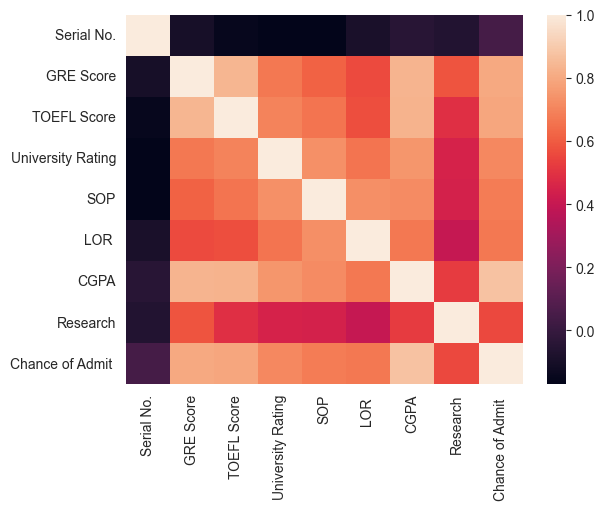

In [7]:
admission_df.corr()
sns.heatmap(admission_df.corr(),linecolor='white')

As seen in above heatmap 'CGPA' parameter is highly correlated with 'Chance of Admit' whereas 'Research' parameter is least correlated with other parameters

## Pairplot 

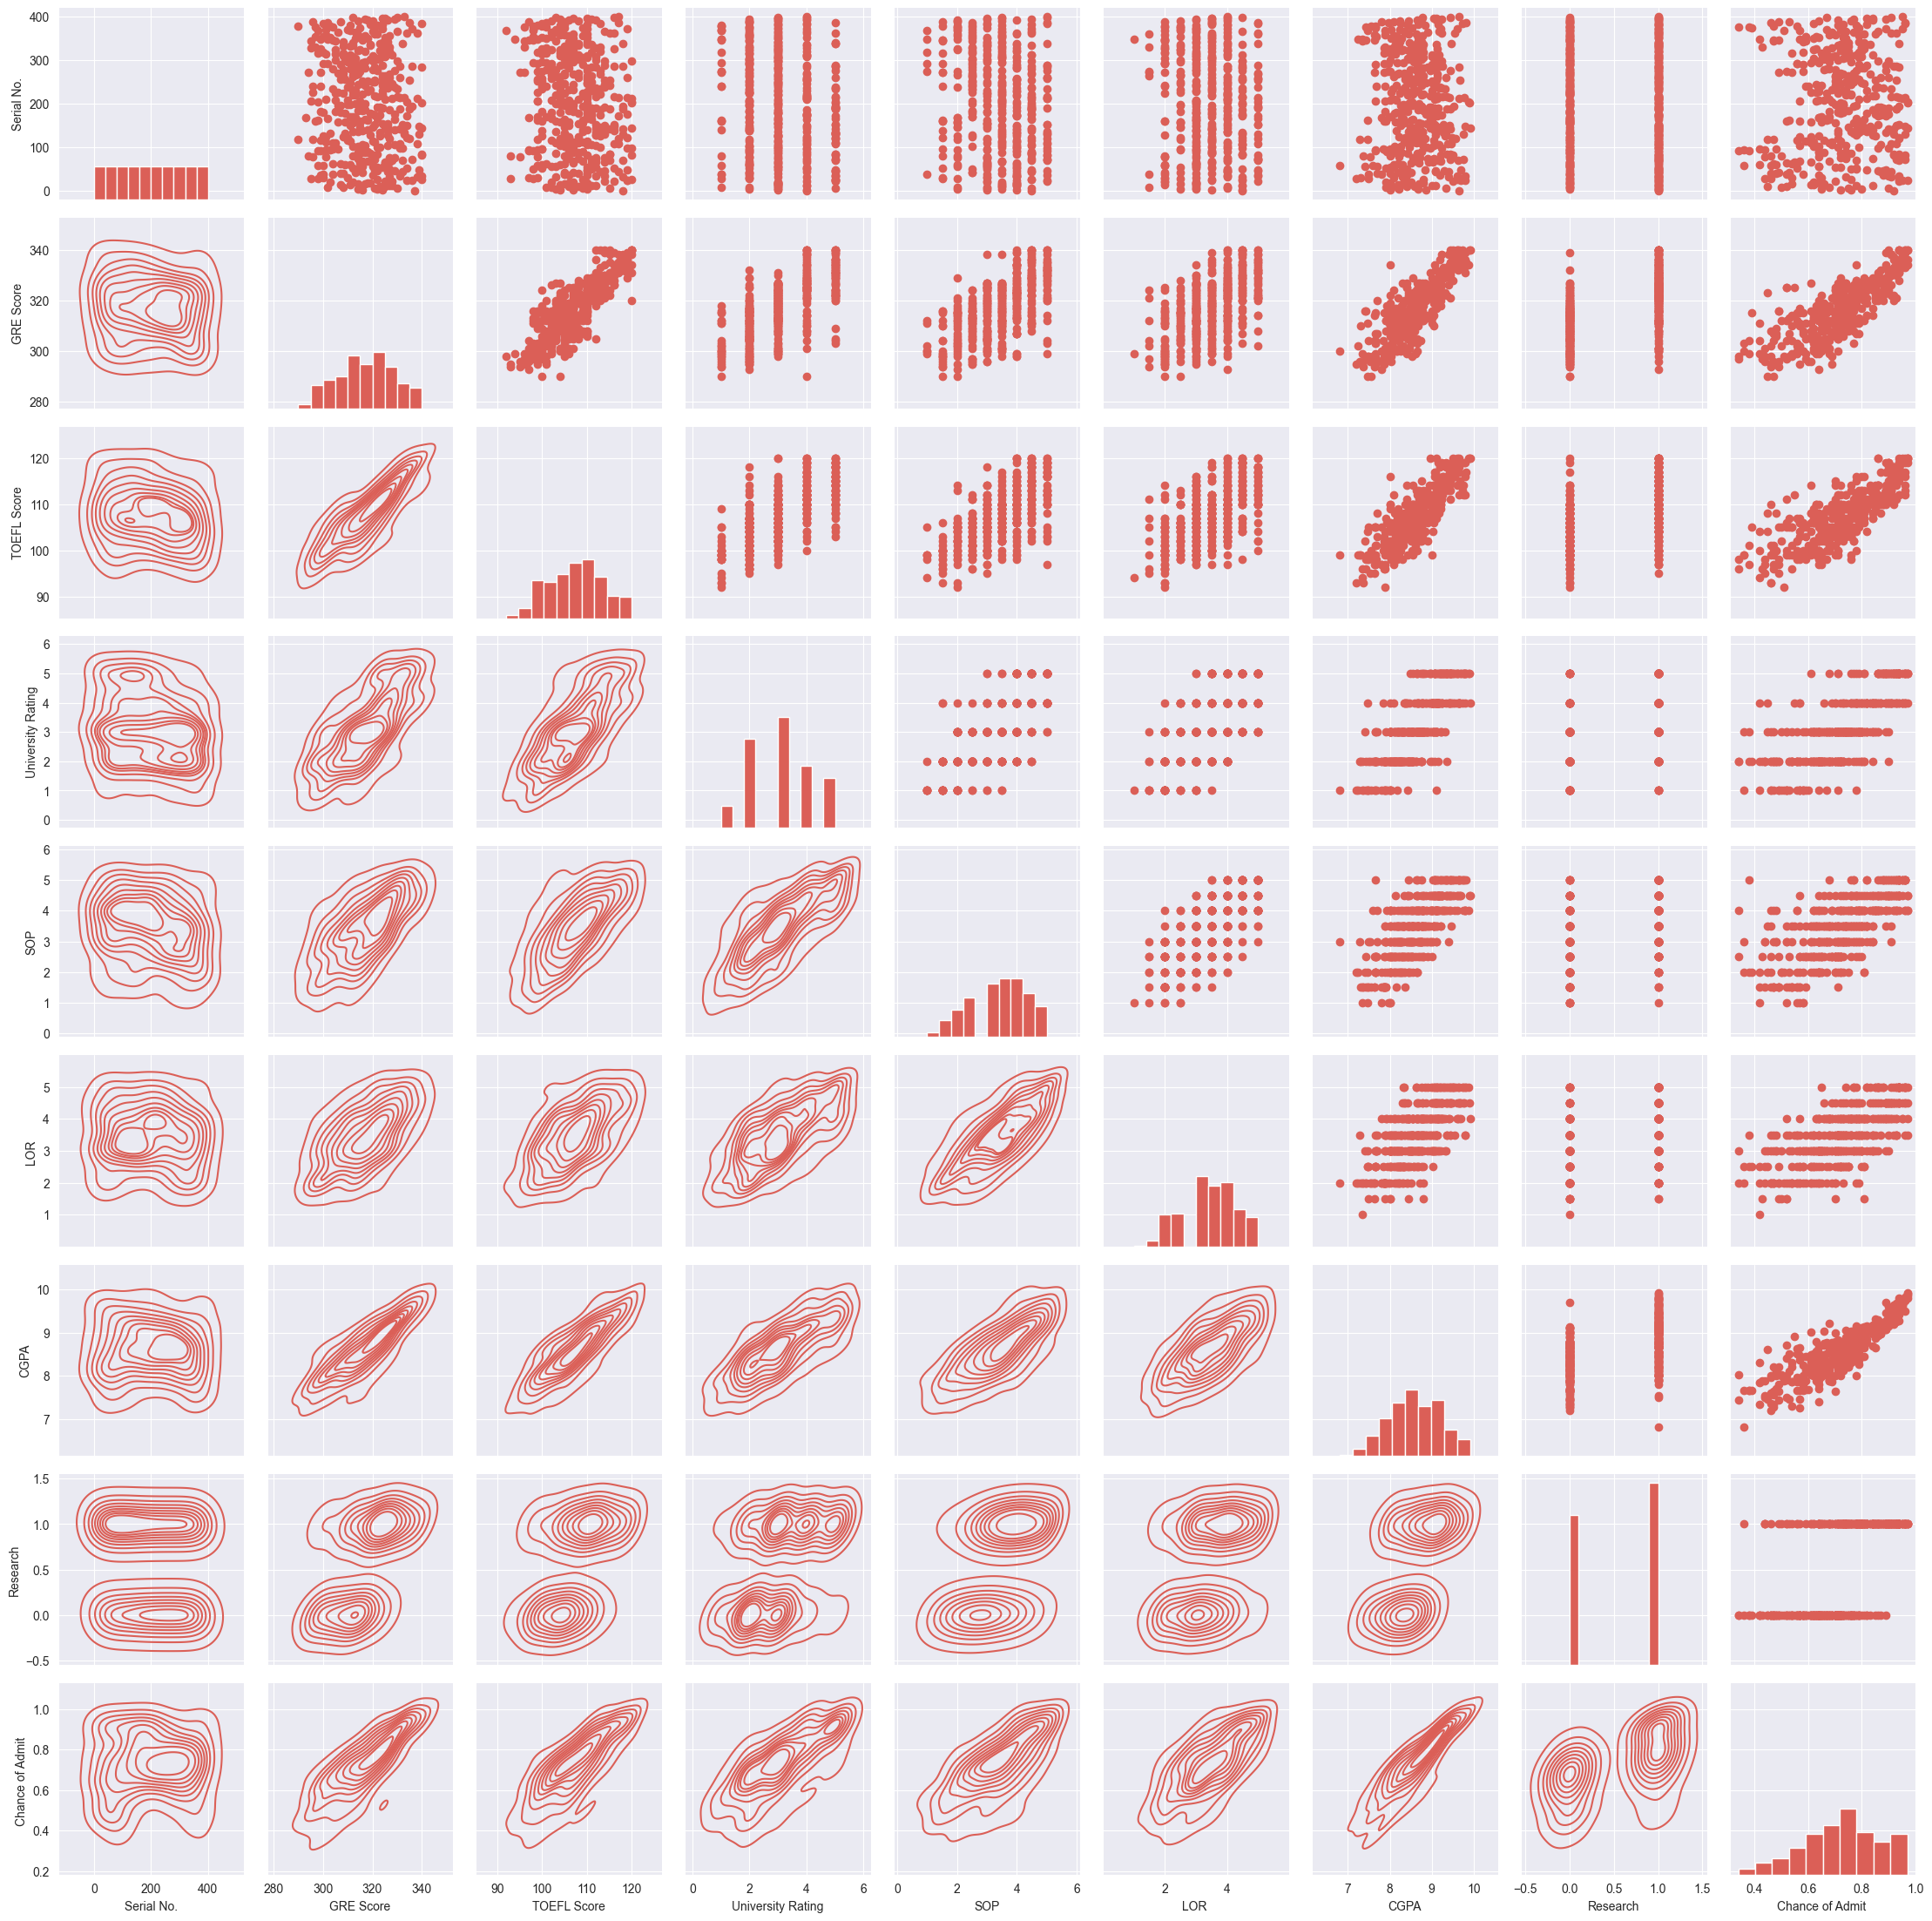

In [8]:
# Map to upper,lower and diagonal
plot = sns.PairGrid(admission_df)
plot.map_diag(plt.hist)
plot.map_upper(plt.scatter)
plot.map_lower(sns.kdeplot)

## Plots showcasing the distribution of ***GRE Score***

<Axes: xlabel='GRE Score'>

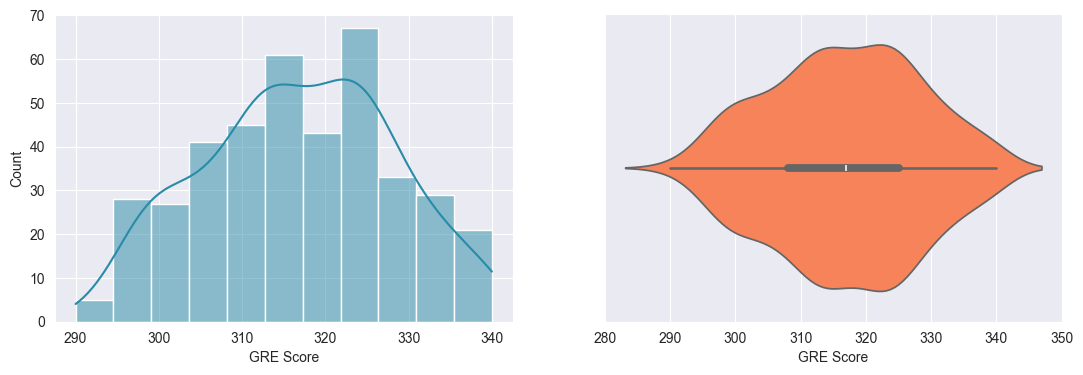

In [9]:
plt.figure(figsize=(13,4))

plt.subplot(1,2,1)
sns.histplot(x="GRE Score", data=admission_df,color='#288BA8',kde=True,lw=1)

plt.subplot(1,2,2)
sns.violinplot(x="GRE Score", data=admission_df,color='#FF7F50',saturation=0.9)

## Plots showcasing the distribution of ***TOEFL Score***

<Axes: xlabel='TOEFL Score'>

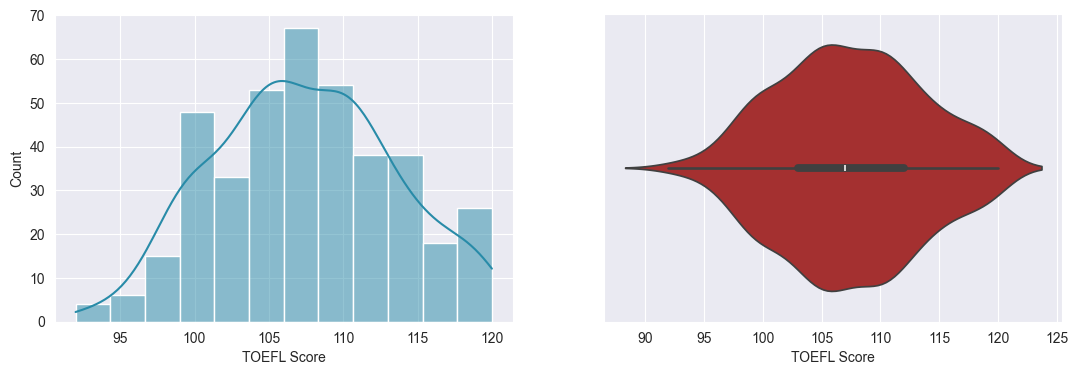

In [10]:
plt.figure(figsize=(13,4))

plt.subplot(1,2,1)
sns.histplot(x="TOEFL Score", data=admission_df,color='#288BA8',kde=True,lw=1)

plt.subplot(1,2,2)
sns.violinplot(x="TOEFL Score", data=admission_df,color='#B22222',saturation=0.8)

## Countplot for the ***University Rating*** 

<Axes: xlabel='University Rating', ylabel='count'>

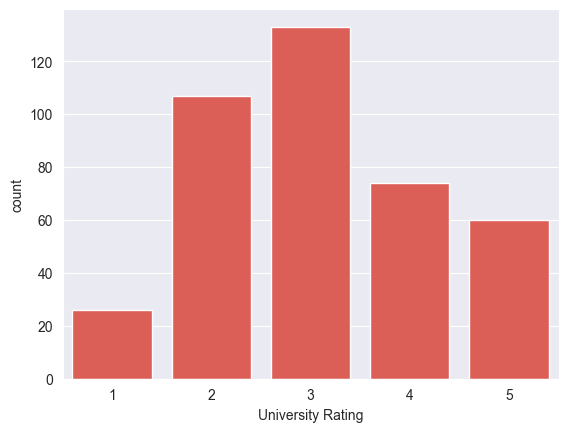

In [11]:
sns.countplot(x=admission_df['University Rating'],saturation=1)

## Countplot for the ***Research*** parameter

<Axes: xlabel='Research', ylabel='count'>

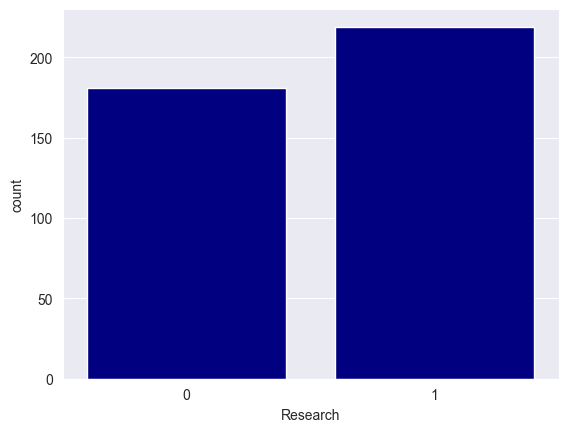

In [12]:
sns.countplot(x='Research',data=admission_df,saturation=5, color='navy')

## Countplot for the ***Research*** & ***University Rating*** respective of each other

Text(0.5, 1.0, 'Research count plot taking University Rating into consideration')

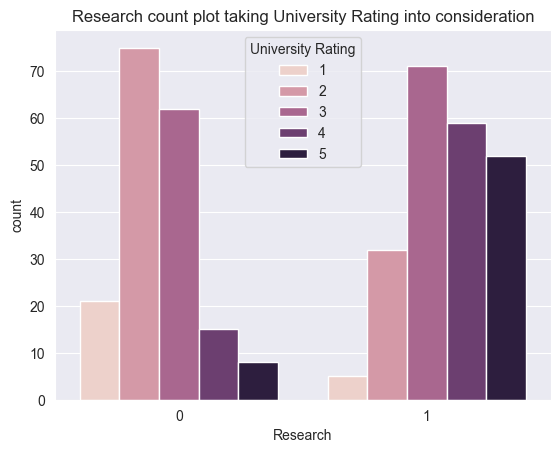

In [13]:
sns.countplot(x=admission_df['Research'],hue=admission_df['University Rating'],saturation=1)
plt.title("Research count plot taking University Rating into consideration")

/var/folders/lb/12wv9m8905x440st4_jhb2kr0000gn/T/ipykernel_12763/2228670465.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  sns.countplot(x=admission_df['University Rating'],hue=admission_df['Research'],saturation=0.8,color='green')


Text(0.5, 1.0, "University Rating counts taking 'Research' into consideration")

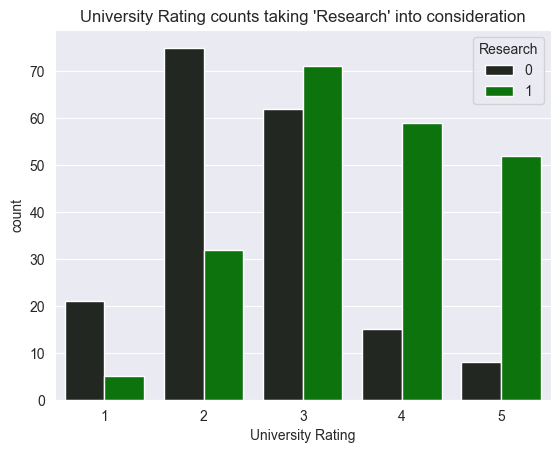

In [14]:
sns.countplot(x=admission_df['University Rating'],hue=admission_df['Research'],saturation=0.8,color='green')
plt.title("University Rating counts taking 'Research' into consideration")

## Countplot for ***SOP*** parameter

<Axes: xlabel='SOP', ylabel='count'>

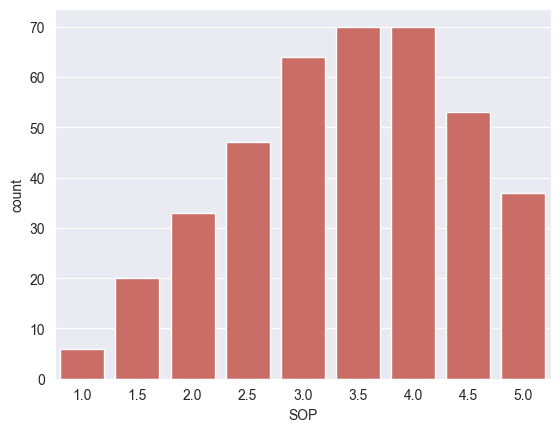

In [15]:
sns.countplot(x='SOP',data=admission_df)

## Countplot of ***LOR*** parameter

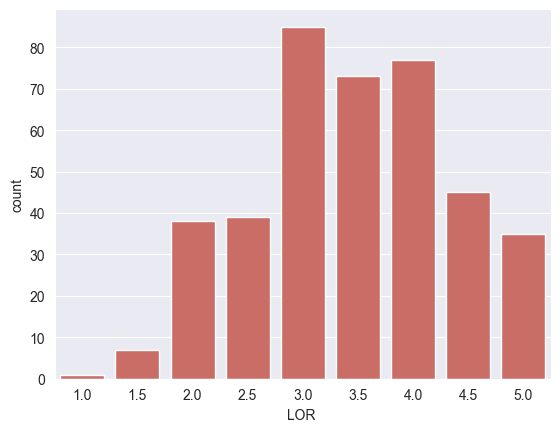

In [16]:
sns.countplot(x='LOR ',data=admission_df);

## Regression Plot (lmplot) for showcasing the corr between 'Chance of Admit' & other paramaters taking 'Research' into consideration

These plots will provide the rough idea about dependency of desire parameter ('Chance of Admit ') on other parameters.<br/>

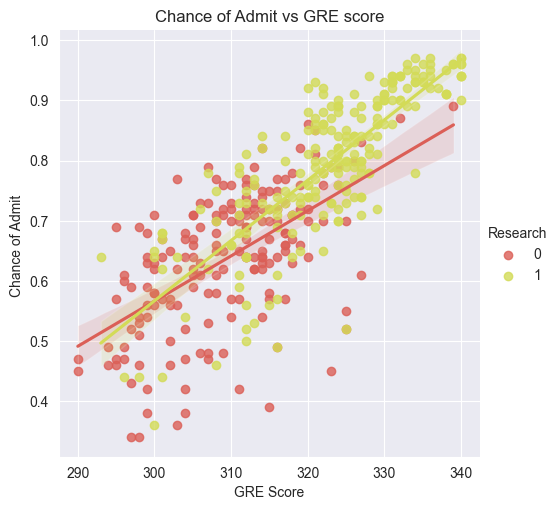

In [17]:
sns.lmplot(x='GRE Score',y='Chance of Admit ',data=admission_df,hue='Research')
plt.title('Chance of Admit vs GRE score');

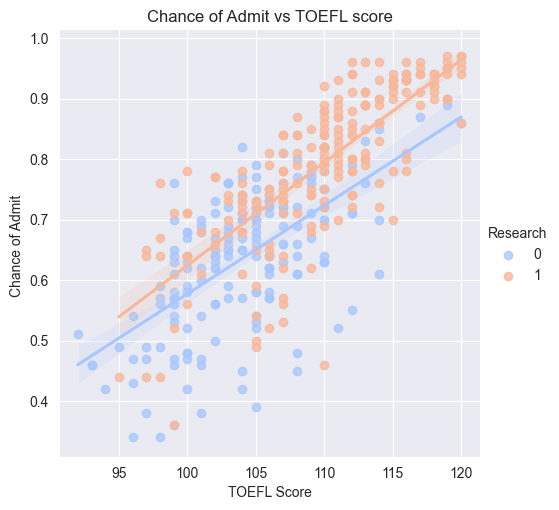

In [18]:
sns.lmplot(x='TOEFL Score',y='Chance of Admit ',data=admission_df,hue='Research',palette='coolwarm')
plt.title('Chance of Admit vs TOEFL score');

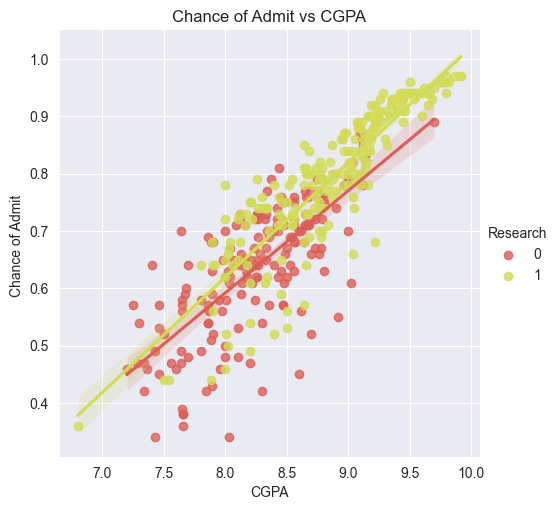

In [19]:
sns.lmplot(x='CGPA',y='Chance of Admit ',data=admission_df,hue='Research')
plt.title('Chance of Admit vs CGPA');

# Insights from Visualizations
* From the heatmap itself we see the correlation between all the parameters and in case of 'Chance of Admit' it is highest with 'CGPA' parameter.
* From Pairplot we came to know that 'University Rating', 'SOP', 'LOR ' & 'Research' are all categorical features and hence later on we have plotted count plots for them.
* Various plots (countplot, histplot etc.) showcased the distribution of the respective parameter values in the data
* At last regression plot showed the linear model that directly relate the desire parameter (Chance of Admit) with other parameters

# **Predictive Analysis** 

## Import the libraries

In [20]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor


## Split the data

In [21]:
X=admission_df.drop(['Chance of Admit '],axis=1)
y=admission_df['Chance of Admit ']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [22]:
# create a linear regression object
lr=LinearRegression()
# fit the model
lr.fit(X_train,y_train)
# predict the values for test data
pred1 = lr.predict(X_test)

## Model Evaluation

Score For Train Data : 0.8157123222604521
Score For Test Data : 0.8212241793299229
The mean absolute error: 0.049943391665432706
The mean squared error: 0.004616592264723954
The root mean squared error: 0.06794550952582484




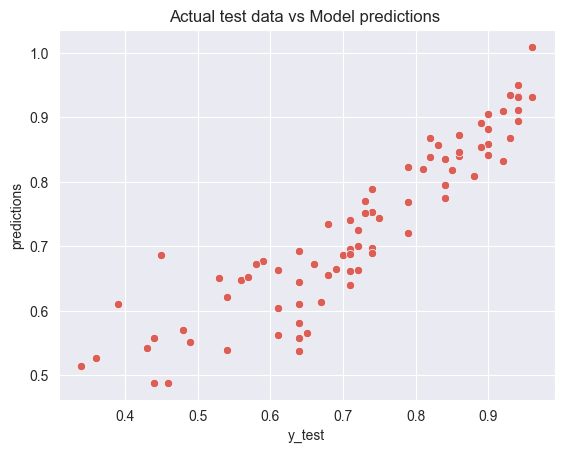

In [23]:
# Regression Score of the model
print('Score For Train Data : {}'.format(lr.score(X_train,y_train)))
print('Score For Test Data : {}'.format(lr.score(X_test,y_test)))

print('The mean absolute error:', metrics.mean_absolute_error(y_test, pred1))
print('The mean squared error:', metrics.mean_squared_error(y_test, pred1))
print('The root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, pred1)))
print('\n')

# Plot showacasing the how well model fitted on testing data
sns.scatterplot(x=y_test, y=pred1);
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Actual test data vs Model predictions ')
plt.show()

This shows that our model is not well fitted on the data. <br/> So we need to used another ML algorithms for more accuracy

# Decision Tree Regression

In [24]:
# create a regressor object
DTR = DecisionTreeRegressor() 
# fit the model
DTR.fit(X_train,y_train)
# predict the values for test data
pred2 = DTR.predict(X_test)

## Model Evaluation

Score For Train Data : 1.0
Score For Test Data : 0.7996484529813426
The mean absolute error: 0.048124999999999994
The mean squared error: 0.0051737499999999995
The root mean squared error: 0.07192878422439795




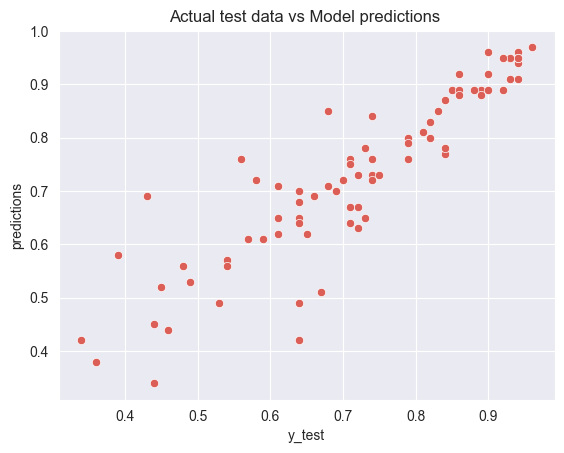

In [25]:
# Regression Score of the model
print('Score For Train Data : {}'.format(DTR.score(X_train,y_train)))
print('Score For Test Data : {}'.format(DTR.score(X_test,y_test)))

print('The mean absolute error:', metrics.mean_absolute_error(y_test, pred2))
print('The mean squared error:', metrics.mean_squared_error(y_test, pred2))
print('The root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, pred2)))
print('\n')

# Plot showacasing the how well model fitted on testing data
sns.scatterplot(x=y_test, y=pred2);
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Actual test data vs Model predictions ')
plt.show()

# Random Forest Regression

In [26]:
# create regressor object
RFreg = RandomForestRegressor(n_estimators = 100)

# fit the regressor with x and y data
RFreg.fit(X_train,y_train) 
# predict the values for test data
pred3 = RFreg.predict(X_test)

## Model Evaluation

Score For Train Data : 0.9727721451855218
Score For Test Data : 0.8473385107354957
The mean absolute error: 0.04400000000000003
The mean squared error: 0.003942232499999999
The root mean squared error: 0.06278720012868864




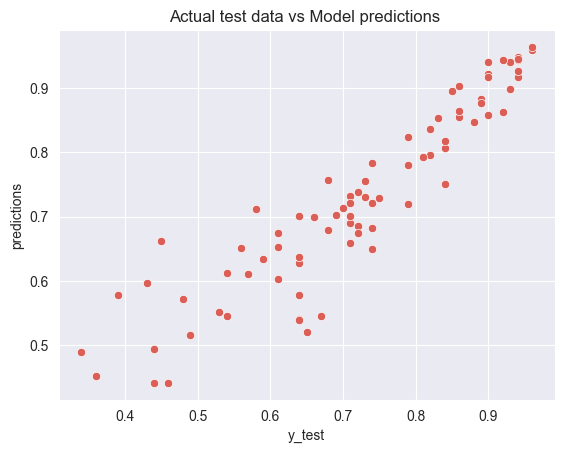

In [27]:
# Regression Score of the model
print('Score For Train Data : {}'.format(RFreg.score(X_train,y_train)))
print('Score For Test Data : {}'.format(RFreg.score(X_test,y_test)))

print('The mean absolute error:', metrics.mean_absolute_error(y_test, pred3))
print('The mean squared error:', metrics.mean_squared_error(y_test, pred3))
print('The root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, pred3)))
print('\n')

# Plot showacasing the how well model fitted on testing data
sns.scatterplot(x=y_test, y=pred3);
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Actual test data vs Model predictions ')
plt.show()

# KNN

In [28]:
from sklearn.neighbors import KNeighborsRegressor
# create KKNeighborsRegressor object with initial value of n =2
KNneigh = KNeighborsRegressor(n_neighbors=2)

# fit the regressor with x and y data
KNneigh.fit(X_train,y_train)
# predict the values for test data
pred4 = KNneigh.predict(X_test)

## Model Evaluation

Score For Train Data : 0.9234213152101798
Score For Test Data : 0.6502560968599771
The mean absolute error: 0.0663125
The mean squared error: 0.009031562500000001
The root mean squared error: 0.09503453319714893




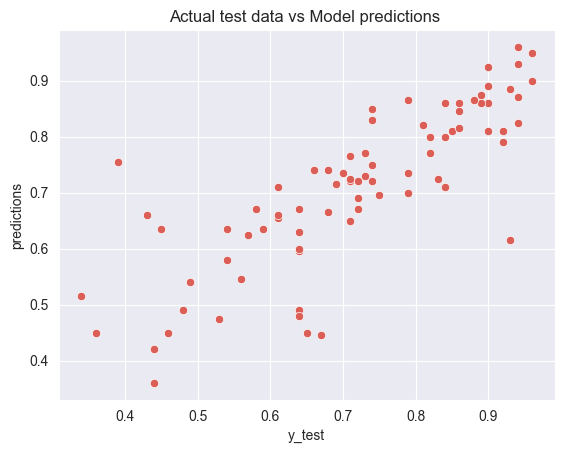

In [29]:
# Regression Score of the model
print('Score For Train Data : {}'.format(KNneigh.score(X_train,y_train)))
print('Score For Test Data : {}'.format(KNneigh.score(X_test,y_test)))

print('The mean absolute error:', metrics.mean_absolute_error(y_test, pred4))
print('The mean squared error:', metrics.mean_squared_error(y_test, pred4))
print('The root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, pred4)))
print('\n')

# Plot showacasing the how well model fitted on testing data
sns.scatterplot(x=y_test, y=pred4);
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Actual test data vs Model predictions ')
plt.show()

# XGBoost Regression

In [34]:
!pip3 install xgboost

  Using cached xgboost-2.0.1-py3-none-macosx_12_0_arm64.whl.metadata (2.0 kB)
Using cached xgboost-2.0.1-py3-none-macosx_12_0_arm64.whl (1.9 MB)


In [35]:
import xgboost as xg
# create xgboost object with initial value of n estimators =10
xgb_reg = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10)

# fit the regressor with x and y data
xgb_reg.fit(X_train,y_train)
# predict the values for test data
pred5 = xgb_reg.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [10:43:34] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Score For Train Data : 0.9815437688572238
Score For Test Data : 0.8219230835819051
The mean absolute error: 0.04531821911036968
The mean squared error: 0.0045985442090563005
The root mean squared error: 0.06781256674876937




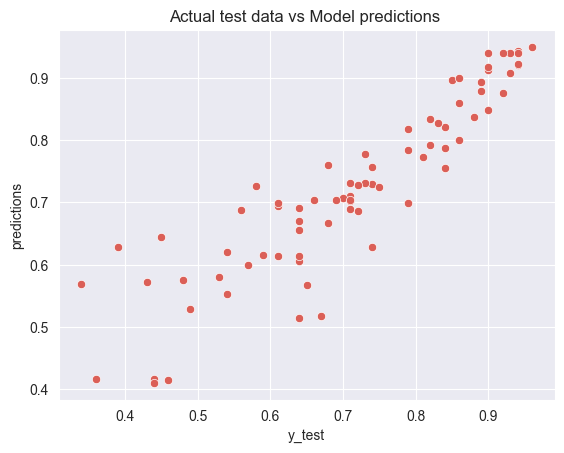

In [36]:
# Regression Score of the model
print('Score For Train Data : {}'.format(xgb_reg.score(X_train,y_train)))
print('Score For Test Data : {}'.format(xgb_reg.score(X_test,y_test)))

print('The mean absolute error:', metrics.mean_absolute_error(y_test, pred5))
print('The mean squared error:', metrics.mean_squared_error(y_test, pred5))
print('The root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, pred5)))
print('\n')

# Plot showacasing the how well model fitted on testing data
sns.scatterplot(x=y_test, y=pred5);
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Actual test data vs Model predictions ')
plt.show()

# Compare the performance of models

| Model     | Score For Test Data    | RMSE value
| ----------- | ----------- | --------------|
| Linear Regression    |    0.7952 | 0.0679 |
| Decision Tree Regression    | 0.6766 | 0.0914 |
| Random Forest Regression   | 0.8072 |  0.0706 |
| KNN    | 0.6535 | 0.0946 |
| XGBoost Regression   | 0.7991 | 0.0721 |